In [4]:
using ITensors, JLD2
using Plots
plotlyjs()

Plots.PlotlyJSBackend()

In [2]:
include("../power_method/compute_entropies.jl")

generalized_entropy

In [29]:
ising = jldopen("./out_ising.jld2")
potts = jldopen("./out_potts.jld2")
xxmod = jldopen("./out_xxz.jld2")

JLDFile /Users/uno/tensornetworks/fes_oe/julia_code/ground_state/out_xxz.jld2 (read-only)
 ├─🔢 ggs
 ├─🔢 psiend
 └─🔢 eend

┌ Info: Saved animation to /var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_jsxyHSXqz6.gif
└ @ Plots /Users/uno/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_jsxyHSXqz6.gif")
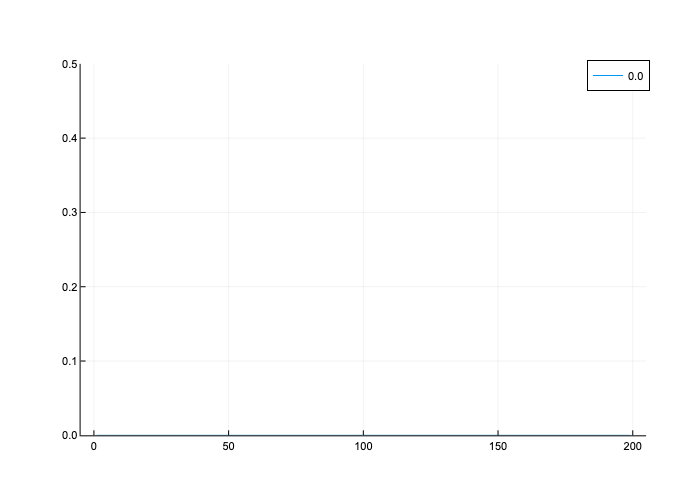

In [10]:
anim = @animate for (ii, psiGS) in enumerate(ising["psiend"])
 
    pre=plot(vn_entanglement_entropy(psiGS), label= ising["ggs"][ii], ylimits = [0,0.5])
    plot(pre)

    end

gif(anim, fps=5)

┌ Info: Saved animation to /var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_x8nQPqDIBg.gif
└ @ Plots /Users/uno/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_x8nQPqDIBg.gif")
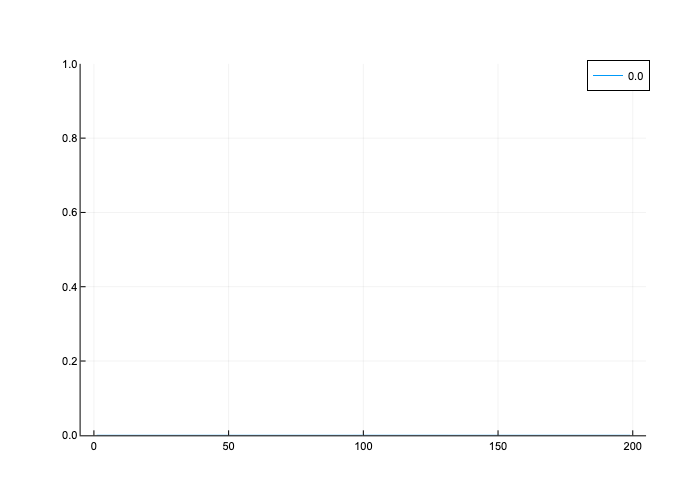

In [17]:
anim = @animate for (ii, psiGS) in enumerate(potts["psiend"])
 
    pre=plot(vn_entanglement_entropy(psiGS), label= potts["ggs"][ii], ylimits = [0,1])
    plot(pre)

    end

gif(anim, fps=1)

In [28]:
psi010 = potts["psiend"][3]
psi015 = potts["psiend"][4]

println(norm(psi015))
println([vn_entanglement_entropy_cut(psi010,nn) for nn = 60:110])
println([vn_entanglement_entropy_cut(psi015,nn) for nn = 60:110])

0.9999999999999991
[0.06444981674811587, 0.12585738758792994, 0.22580829208358935, 0.35628458738089563, 0.46389745566087304, 0.47367930696811994, 0.3679208700327563, 0.21686105490777932, 0.10312228543256041, 0.044596706277412135, 0.020261825280532116, 0.01004835002494841, 0.005396183284751966, 0.003031512748700856, 0.001711545148837985, 0.0009677906725827499, 0.0005305905437487972, 0.00027534535743125633, 0.00013768267611368403, 6.546485546365133e-5, 2.9670803386363764e-5, 1.2883358020938791e-5, 6.2153539178839105e-6, 3.851991589107302e-6, 3.2849234700054688e-6, 3.2300847829945156e-6, 3.2299594719586266e-6, 3.2299591406081904e-6, 3.2299591394195525e-6, 3.229959138972685e-6, 3.2299591391964525e-6, 3.2299591389759677e-6, 3.22995913897466e-6, 

3.2299591387537604e-6, 3.2299591385286906e-6, 3.229959138306809e-6, 3.2299591383097153e-6, 3.229959138085883e-6, 3.229959137862486e-6, 3.2299591376421614e-6, 3.229959137419009e-6, 3.229959137418193e-6, 3.2299591371989264e-6, 3.2299591371991145e-6, 3.2299591369763228e-6, 3.229959136974611e-6, 3.2299591371956306e-6, 3.2299591369764875e-6, 3.2299591369756697e-6, 3.2299591367527438e-6, 3.2299591363128863e-6]
[0.0123902309234469, 0.014563004046104014, 0.016947288215870302, 0.019649349927722663, 0.022766359241658974, 0.026327535966772144, 0.030484095928274814, 0.03514671927057429, 0.04044839900018991, 0.04566347606436619, 0.05174343699302923, 0.05889487510521325, 0.06716535855524085, 0.07633658665464542, 0.08606879457663652, 0.09576802924236406, 0.10533945664334368, 0.11435261541817994, 0.12209146680731327, 0.12810117086551487, 0.13123312628989442, 0.13138510404971399, 0.1339140911743963, 0.1459548058381522, 0.1924057110733277, 0.2827432202535489, 0.39299393963655554, 0.455685961933163, 0.45

In [26]:
println(linkdims(psi015))

[3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 5, 6, 5, 6, 5, 7, 6, 6, 6, 6, 7, 6, 7, 7, 8, 8, 9, 6, 7, 7, 8, 9, 11, 7, 7, 7, 8, 8, 12, 12, 15, 8, 11, 10, 12, 11, 13, 13, 19, 17, 17, 14, 14, 14, 13, 12, 10, 8, 9, 9, 12, 8, 8, 9, 9, 9, 8, 8, 9, 8, 10, 9, 8, 10, 9, 8, 9, 9, 8, 8, 7, 8, 8, 8, 8, 9, 8, 7, 8, 7, 9, 9, 8, 7, 7, 7, 7, 7, 6, 6, 6, 6, 4, 6, 4, 5, 4, 5, 4, 4, 4, 4, 4, 4, 4, 4, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]


In [25]:
cut = 90
orthogonalize!(psi015, cut)

 _,S,_ = svd(psi015[cut], (linkind(psi015, cut-1), siteind(psi015,cut)))

println(S)

ITensor ord=2


Dim 1: (dim=14|id=757|"Link,u")
Dim 2: (dim=14|id=827|"Link,v")
NDTensors.Diag{Float64, Vector{

Float64}}
 14×14
 0.8984635468962476  0.0                 0.0                    0.0                    0.0                    0.0                    0.0                    0.0                     0.0                     0.0                     0.0                  0.0                   0.0                    0.0
 0.0                 0.4390440243421563  0.0                    0.0                    0.0                    0.0                    0.0                    0.0                     0.0                     0.0                     0.0                  0.0                   0.0                    0.0
 0.0                 0.0                 0.0015291113960599555  0.0                    0.0                    0.0                    0.0                    0.0                     0.0                     0.0                     0.0                  0.0                   0.0                    0.0
 0.0                 0.0                 0.0                    0.0007176418081795243  0.

┌ Info: Saved animation to /var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_tk9AhcJ09s.gif
└ @ Plots /Users/uno/.julia/packages/Plots/sxUvK/src/animation.jl:156


Plots.AnimatedGif("/var/folders/lh/t1j2dd9171q8z7x5ff9j4b2w0000gn/T/jl_tk9AhcJ09s.gif")
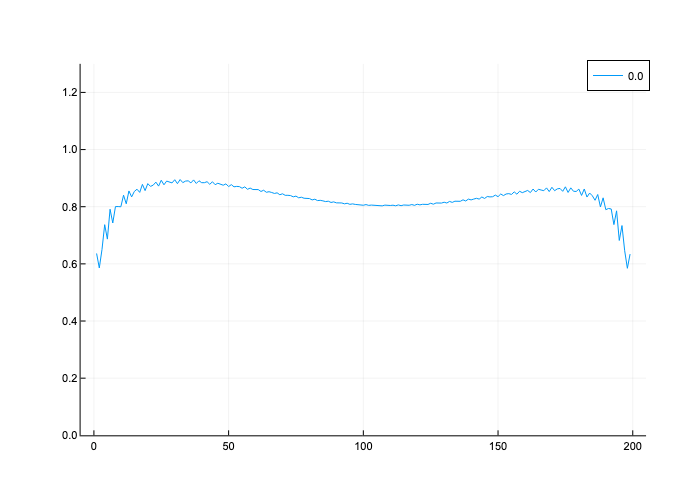

In [16]:
anim = @animate for (ii, psiGS) in enumerate(xxmod["psiend"][6:24])
 
    pre=plot(vn_entanglement_entropy(psiGS), label= xxmod["ggs"][ii], ylimits = [0,1.3])
    plot(pre)

    end

gif(anim, fps=5)